# P1 - Identificando personas desde una imagen de su cara

Elaborado por GRUPO 1:

- Juanita Piraban Barbosa - 201216313
- Lorena Morales Rodríguez - 202027957
- Alejandro Barinas Guio - 201628859
- Jaime Humberto Trujillo Perea - 201920366
- Alexander Zapata Galindo - 201425426

In [1]:
# Librerías
from sklearn.datasets import fetch_lfw_people
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# DataSet
lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

In [3]:
# Images
lfw_people.images.shape

(1560, 50, 37)

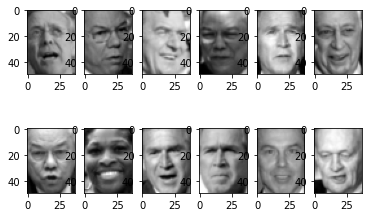

In [98]:
# Ejemplos
plt.subplot(2,6,1)
plt.imshow(lfw_people.images[2], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,2)
plt.imshow(lfw_people.images[8], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,3)
plt.imshow(lfw_people.images[29], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,4)
plt.imshow(lfw_people.images[15], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,5)
plt.imshow(lfw_people.images[900], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,6)
plt.imshow(lfw_people.images[6], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,7)
plt.imshow(lfw_people.images[27], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,8)
plt.imshow(lfw_people.images[24], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,9)
plt.imshow(lfw_people.images[750], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,10)
plt.imshow(lfw_people.images[455], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,11)
plt.imshow(lfw_people.images[13], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,12)
plt.imshow(lfw_people.images[1550], cmap=plt.get_cmap('gray'))
plt.show()


In [99]:
list(y_train_labels)

[array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [79]:
# images and labels
X = lfw_people.images
y = lfw_people.target
target_names = lfw_people.target_names

In [80]:
X.shape

(1560, 50, 37)

In [81]:
y.shape

(1560,)

In [82]:
# split into a training and testing set
X_train_image, X_test_image, y_train_labels, y_test_labels = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [83]:
#shape train
print(X_train_image.shape)
n_train=X_train_image.shape[0]

(1170, 50, 37)


In [84]:
#shape test
print(X_test_image.shape)
n_test=X_test_image.shape[0]

(390, 50, 37)


In [85]:
# Transformacion
X_train_image = X_train_image.reshape((n_train, 50 * 37))
X_train_image = X_train_image.astype('float32') / 255
X_test_image = X_test_image.reshape((n_test, 50 * 37))
X_test_image = X_test_image.astype('float32') / 255

In [86]:
# Categorizar datos 
y_train_labels = to_categorical(y_train_labels)
y_test_labels = to_categorical(y_test_labels)

In [87]:
y_train_labels.shape

(1170, 12)

In [88]:
y_test_labels.shape

(390, 12)

### MODELO 1

In [89]:
model_1 = models.Sequential()
model_1.add(layers.Dense(1850, activation='relu', input_shape=(50 * 37,)))
model_1.add(layers.Dense(185, activation='sigmoid'))
model_1.add(layers.Dense(12, activation='softmax'))
model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [90]:
model_1.fit(X_train_image, y_train_labels, epochs=150, batch_size=256)

Epoch 1/150
5/5 [==============================] - 2s 55ms/step - loss: 2.6668 - accuracy: 0.1550
Epoch 2/150
5/5 [==============================] - 0s 61ms/step - loss: 2.3199 - accuracy: 0.3328
Epoch 3/150
5/5 [==============================] - 0s 66ms/step - loss: 2.2766 - accuracy: 0.3194
Epoch 4/150
5/5 [==============================] - 0s 58ms/step - loss: 2.1806 - accuracy: 0.3305
Epoch 5/150
5/5 [==============================] - 0s 58ms/step - loss: 2.1426 - accuracy: 0.3394
Epoch 6/150
5/5 [==============================] - 0s 58ms/step - loss: 2.1554 - accuracy: 0.3300
Epoch 7/150
5/5 [==============================] - 0s 55ms/step - loss: 2.1470 - accuracy: 0.3307
Epoch 8/150
5/5 [==============================] - 0s 58ms/step - loss: 2.1025 - accuracy: 0.3405
Epoch 9/150
5/5 [==============================] - 0s 58ms/step - loss: 2.1298 - accuracy: 0.3306
Epoch 10/150
5/5 [==============================] - 0s 59ms/step - loss: 2.1013 - accuracy: 0.3382
Epoch 11/150
5/5 [=

5/5 [==============================] - 0s 96ms/step - loss: 0.3946 - accuracy: 0.8916
Epoch 84/150
5/5 [==============================] - 0s 50ms/step - loss: 0.3983 - accuracy: 0.8864
Epoch 85/150
5/5 [==============================] - 0s 74ms/step - loss: 0.3794 - accuracy: 0.9047
Epoch 86/150
5/5 [==============================] - 0s 90ms/step - loss: 0.3889 - accuracy: 0.8946
Epoch 87/150
5/5 [==============================] - 0s 65ms/step - loss: 0.4162 - accuracy: 0.8867
Epoch 88/150
5/5 [==============================] - 0s 63ms/step - loss: 0.4160 - accuracy: 0.8876
Epoch 89/150
5/5 [==============================] - 0s 48ms/step - loss: 0.3439 - accuracy: 0.9166
Epoch 90/150
5/5 [==============================] - 0s 105ms/step - loss: 0.3194 - accuracy: 0.9205
Epoch 91/150
5/5 [==============================] - 0s 77ms/step - loss: 0.3136 - accuracy: 0.9142
Epoch 92/150
5/5 [==============================] - 0s 64ms/step - loss: 0.3424 - accuracy: 0.9031
Epoch 93/150
5/5 [====

In [91]:
test_loss, test_acc = model_1.evaluate(X_test_image, y_test_labels)

13/13 [==============================] - 0s 8ms/step - loss: 0.6497 - accuracy: 0.8359
